### Loan Approval Prediction Model
#### By : Shivam Singh

In [13]:
# Import manipulation library
import numpy as np
import pandas as pd

# Import visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Data logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
#3. Import OrderDict()
from collections import OrderedDict

In [14]:
# Data ingestion
def load_data():
    return pd.read_csv(r'C:\15Days15Project\Loan-Approval-Prediction-Model\data\raw\loan_data.csv')
df = load_data()

In [15]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [16]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [32]:
# Descriptive stats

def descriptive_stats():
    numerical_col = df.select_dtypes(exclude = 'object').columns
    categorica_col = df.select_dtypes(include = 'object').columns
    num_stats = []
    cat_stats = []
    data_info = []

    for i in numerical_col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1 
        LF = Q1 - 1.5*IQR
        UF = Q3 + 1.5*IQR

        outlier_count = len(df[(df[i] < LF) | (df[i] > UF)])
        outlier_percentage = outlier_count / len(df[i]) * 100

        numerical_stats = OrderedDict({
            "Feature " : i ,
            "Q1" : Q1,
            "Q3" : Q3,
            "IQR" : IQR,
            "LF" : LF,
            "UF" : UF,
            "Mean" : df[i].mean(),
            "Median" : df[i].median(),
            "Min" : df[i].min(),
            "Max" : df[i].max(),
            "Outlier count" : outlier_count,
            "outlier percentage" : outlier_percentage,
            "standard derivation": df[i].std(),
            "variance" : df[i].var(),
            "skewness" : df[i].skew(),
            "kurtosis" : df[i].kurtosis()
        })
        num_stats.append(numerical_stats)
    numerical_stats_report = pd.DataFrame(num_stats)
    for i in categorica_col:
        categorical_stats = OrderedDict({
            "Feature" : i , 
            "Unquie count" : df[i].nunique(),
            "Value count" : df[i].value_counts(),
            "mode" : df[i].mode()
        })
        cat_stats.append(categorical_stats)
    categorical_stats_report = pd.DataFrame(cat_stats)


    for i in df.columns : 
        data1 = OrderedDict({
            "Feature" : i ,
            "Missing value" : df[i].isnull().sum(),
            "Unqiue value" : df[i].nunique(),
            "value count " : df[i].value_counts().to_dict()
        })
        data_info.append(data1)
    data_info_report = pd.DataFrame(data_info)

    return categorical_stats_report,numerical_stats_report,data_info_report

categorical_stats_report,numerical_stats_report,data_info_report = descriptive_stats()

In [34]:
# numerical stats
numerical_stats_report

,Feature,Q1,Q3,IQR,LF,UF,Mean,Median,Min,Max,Outlier count,outlier percentage,standard derivation,variance,skewness,kurtosis
0,person_age,24.00,30.00,6.00,15.000,39.000,27.764178,26.00,20.00,144.00,2188,4.862222,6.045108,3.654333e+01,2.548154,18.649449
1,person_income,47204.00,95789.25,48585.25,-25673.875,168667.125,80319.053222,67048.00,8000.00,7200766.00,2218,4.928889,80422.498632,6.467778e+09,34.137583,2398.684769
2,person_emp_exp,1.00,8.00,7.00,-9.500,18.500,5.410333,4.00,0.00,125.00,1724,3.831111,6.063532,3.676642e+01,2.594917,19.168324
3,loan_amnt,5000.00,12237.25,7237.25,-5855.875,23093.125,9583.157556,8000.00,500.00,35000.00,2348,5.217778,6314.886691,3.987779e+07,1.179731,1.351215
4,loan_int_rate,8.59,12.99,4.40,1.990,19.590,11.006606,11.01,5.42,20.00,124,0.275556,2.978808,8.873299e+00,0.213784,-0.420335
5,loan_percent_income,0.07,0.19,0.12,-0.110,0.370,0.139725,0.12,0.00,0.66,744,1.653333,0.087212,7.605987e-03,1.034512,1.082416
6,cb_person_cred_hist_length,3.00,8.00,5.00,-4.500,15.500,5.867489,4.00,2.00,30.00,1366,3.035556,3.879702,1.505209e+01,1.631720,3.725945
7,credit_score,601.00,670.00,69.00,497.500,773.500,632.608756,640.00,390.00,850.00,467,1.037778,50.435865,2.543776e+03,-0.610261,0.203022
8,loan_status,0.00,0.00,0.00,0.000,0.000,0.222222,0.00,0.00,1.00,10000,22.222222,0.415744,1.728433e-01,1.336351,-0.214176


In [35]:
# categorical stats
categorical_stats_report

,Feature,Unquie count,Value count,mode
0,person_gender,2,person_gender male 24841 female 20159 ...,"0 male Name: person_gender, dtype: object"
1,person_education,5,person_education Bachelor 13399 Associat...,"0 Bachelor Name: person_education, dtype: o..."
2,person_home_ownership,4,person_home_ownership RENT 23443 MORTGA...,"0 RENT Name: person_home_ownership, dtype: ..."
3,loan_intent,6,loan_intent EDUCATION 9153 MEDICAL ...,"0 EDUCATION Name: loan_intent, dtype: object"
4,previous_loan_defaults_on_file,2,previous_loan_defaults_on_file Yes 22858 No...,"0 Yes Name: previous_loan_defaults_on_file,..."


In [36]:
# data info 
data_info_report

,Feature,Missing value,Unqiue value,value count
0,person_age,0,60,"{23.0: 5254, 24.0: 5138, 25.0: 4507, 22.0: 423..."
1,person_gender,0,2,"{'male': 24841, 'female': 20159}"
2,person_education,0,5,"{'Bachelor': 13399, 'Associate': 12028, 'High ..."
3,person_income,0,33989,"{8000.0: 15, 73011.0: 10, 36995.0: 9, 37020.0:..."
4,person_emp_exp,0,63,"{0: 9566, 2: 4134, 1: 4061, 3: 3890, 4: 3524, ..."
5,person_home_ownership,0,4,"{'RENT': 23443, 'MORTGAGE': 18489, 'OWN': 2951..."
6,loan_amnt,0,4483,"{10000.0: 3617, 5000.0: 2787, 6000.0: 2426, 12..."
7,loan_intent,0,6,"{'EDUCATION': 9153, 'MEDICAL': 8548, 'VENTURE'..."
8,loan_int_rate,0,1302,"{11.01: 3329, 10.99: 804, 7.51: 798, 7.49: 687..."
9,loan_percent_income,0,64,"{0.08: 2593, 0.1: 2421, 0.07: 2415, 0.09: 2295..."


In [37]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

### Data Insights
- Data is non-normal Distributed
- Loan_status is target columns
- There is no missing value

### EDA


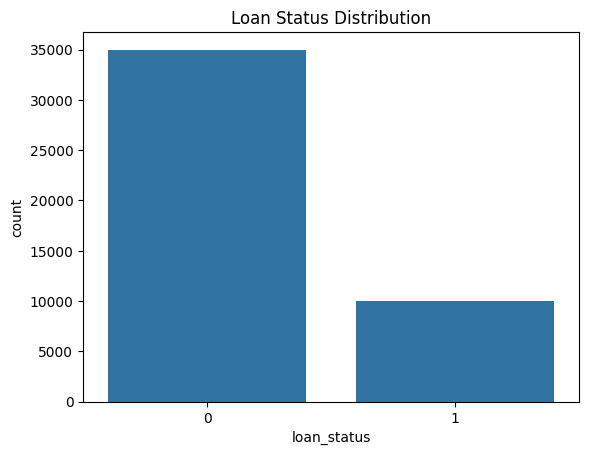

In [38]:
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()

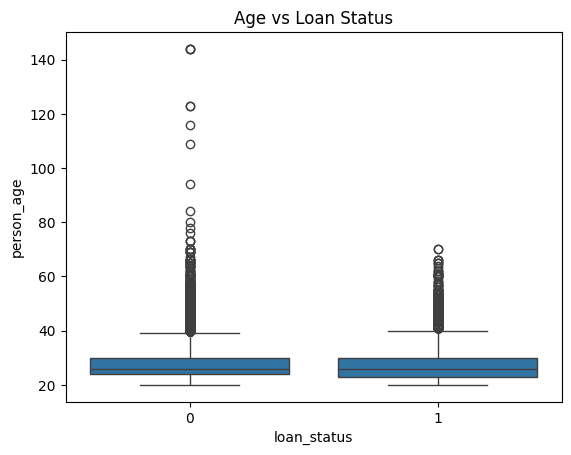

In [39]:
sns.boxplot(x='loan_status', y='person_age', data=df)
plt.title('Age vs Loan Status')
plt.show()

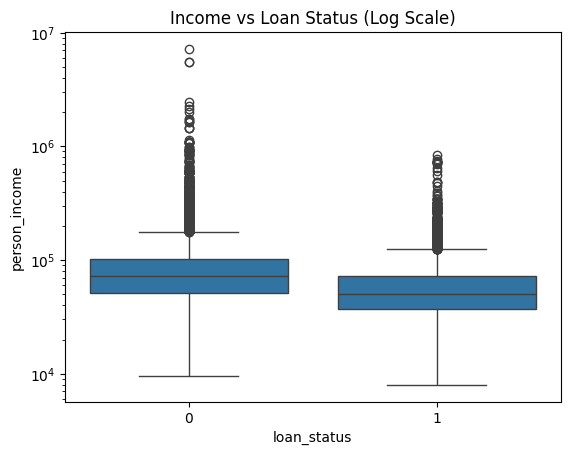

In [40]:
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.yscale('log')   # IMPORTANT since data is non-normal
plt.title('Income vs Loan Status (Log Scale)')
plt.show()

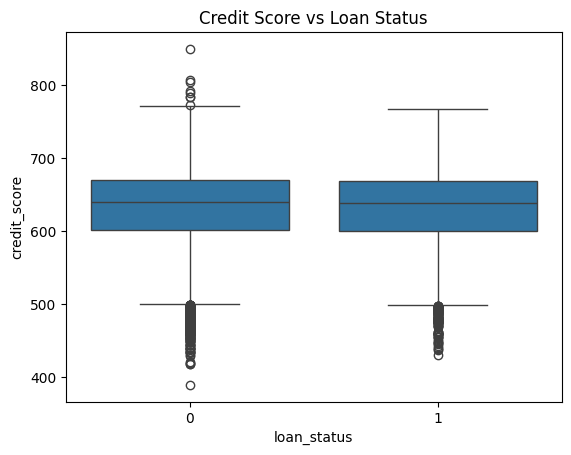

In [41]:
sns.boxplot(x='loan_status', y='credit_score', data=df)
plt.title('Credit Score vs Loan Status')
plt.show()

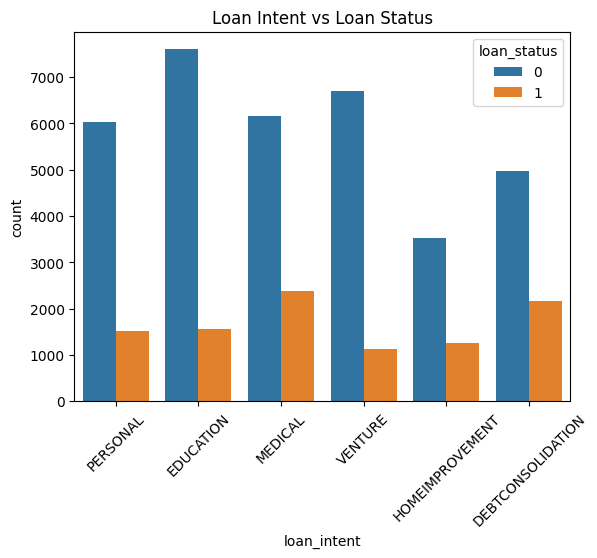

In [42]:
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.xticks(rotation=45)
plt.title('Loan Intent vs Loan Status')
plt.show()

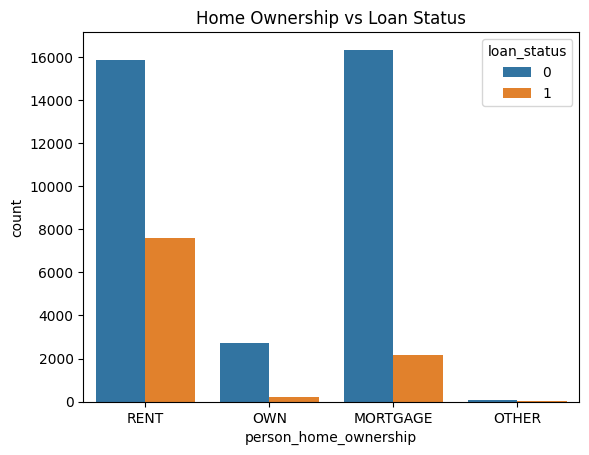

In [43]:
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title('Home Ownership vs Loan Status')
plt.show()

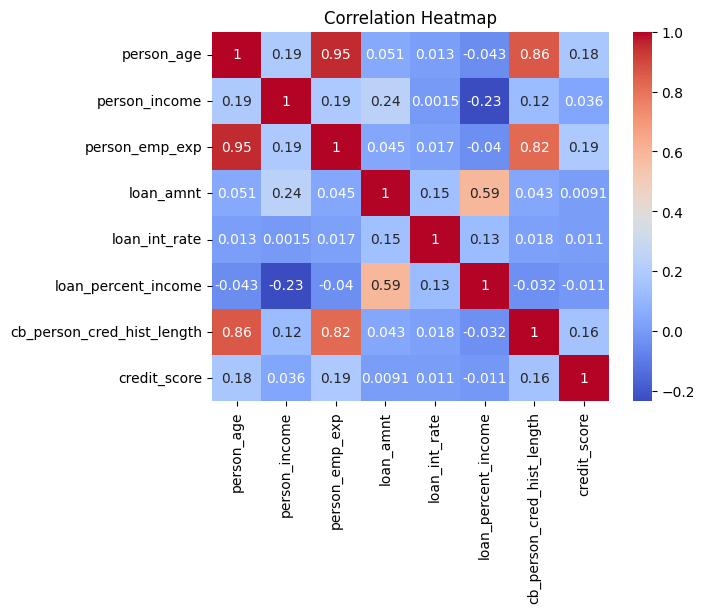

In [51]:
num_cols = [
    'person_age', 'person_income', 'person_emp_exp',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score'
]

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Feature Engineering 

In [45]:
# log income 
df['log_income'] = np.log1p(df['person_income'])

In [46]:
# loan to income
df['loan_income_ratio'] = df['loan_amnt'] / df['person_income']

In [47]:
# Experience to Age Ratio
df['emp_exp_ratio'] = df['person_emp_exp'] / df['person_age']

In [49]:
# Credit History Strength
df['credit_history_score'] = (
    df['credit_score'] * df['cb_person_cred_hist_length']
)

In [50]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,log_income,loan_income_ratio,emp_exp_ratio,credit_history_score
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,11.183713,0.486462,0.000000,1683.0
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,9.415971,0.081420,0.000000,1008.0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,9.428592,0.442193,0.120000,1905.0
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,11.286702,0.438855,0.000000,1350.0
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,11.099469,0.529221,0.041667,2344.0


#### Data Preprocessing

In [55]:
# train test split
from sklearn.model_selection import train_test_split 

X = df.drop(columns= ['loan_status'])
y = df['loan_status']

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size= 0.3 , random_state= 42)


In [56]:
# Encoding & scalling
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer

categorical_cols  = X.select_dtypes(include= 'object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(),numerical_cols),
        ('cat' , OneHotEncoder(handle_unknown='ignore') ,categorical_cols)
    ]

)

# apply transformation
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_build(X_train, X_test, y_train, y_test):

    models = {
        'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000),
        'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced'),
        'RandomForestClassifier': RandomForestClassifier(class_weight='balanced'),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=10, weights='distance')
    }

    model_performance = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        model_performance.append({
            'Model_Name': model_name,
            'Accuracy_Score': accuracy_score(y_test, y_pred),
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=False)
        })

    return pd.DataFrame(model_performance)

In [58]:
model_performance = model_build(X_train,X_test,y_train,y_test)
model_performance

,Model_Name,Accuracy_Score,Confusion_Matrix,Classification_Report
0,LogisticRegression,0.860444,"[[8837, 1656], [228, 2779]]",precision recall f1-score ...
1,DecisionTreeClassifier,0.900148,"[[9798, 695], [653, 2354]]",precision recall f1-score ...
2,RandomForestClassifier,0.930000,"[[10254, 239], [706, 2301]]",precision recall f1-score ...
3,GradientBoostingClassifier,0.924519,"[[10181, 312], [707, 2300]]",precision recall f1-score ...
4,AdaBoostClassifier,0.906741,"[[10002, 491], [768, 2239]]",precision recall f1-score ...
5,KNeighborsClassifier,0.901407,"[[10038, 455], [876, 2131]]",precision recall f1-score ...


#### Conclude

- Credit score and loan-to-income ratio are strongest predictors

- Ensemble models give higher accuracy

- Logistic Regression gives better risk sensitivity

- Threshold tuning is more effective than SMOTE

- Model choice depends on business cost of errors

Although Random Forest achieved the highest accuracy, Logistic Regression demonstrated superior recall for high-risk loan applicants. Since the cost of approving a risky loan is significantly higher than rejecting a safe applicant, Logistic Regression was selected as the final model. Threshold tuning further improved risk detection without introducing synthetic data.